In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import pandas as pd

# Reading the CSV file with a different encoding
df = pd.read_csv(r"C:\Users\DELL\twitter_training.csv", encoding='ISO-8859-1')


# Check the first ten rows to ensure the data was read correctly
print(df.head(10))


   Twitter id       entity sentiment  \
0        2401  Borderlands  Positive   
1        2401  Borderlands  Positive   
2        2401  Borderlands  Positive   
3        2401  Borderlands  Positive   
4        2401  Borderlands  Positive   
5        2401  Borderlands  Positive   
6        2402  Borderlands  Positive   
7        2402  Borderlands  Positive   
8        2402  Borderlands  Positive   
9        2402  Borderlands  Positive   

                                       Tweet content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
5  im getting into borderlands and i can murder y...  
6  So I spent a few hours making something for fu...  
7  So I spent a couple of hours doing something f...  
8  So I spent a few hours doing something for fun...  
9  So I s

In [25]:
df["sentiment"].value_counts()


Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: sentiment, dtype: int64

In [29]:
df.isnull().sum()

Twitter id         0
entity             0
sentiment          0
Tweet content    686
dtype: int64

## Data Cleaning

In [35]:
df.dropna(subset=['sentiment', 'entity', 'Tweet content'], inplace=True)
print(f"Shape of dataset excluding missing values: {df.shape}")

Shape of dataset excluding missing values: (73996, 4)


In [49]:
import re  # Importing the regular expression (re) module for pattern matching and text manipulation


def clean_text(text):
    # Removing URLs (http, https, or www) from the text using regular expression
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Removing mentions (@username) and hashtags (#hashtag) from the text
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Removing any non-alphabetic characters (numbers, punctuation, etc.)
    # Only keeping alphabetic characters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Converting all characters to lowercase to standardize the text
    text = text.lower()
    
    # Returning the cleaned text
    return text


# Applying the clean_text function to the 'Tweet content' column of the DataFrame
# Creating a new column 'cleaned_tweet' with the cleaned text for each tweet
df['cleaned_tweet'] = df['Tweet content'].apply(clean_text)

# Displaying the first 10 rows of the original 'Tweet content' and cleaned 'cleaned_tweet' columns
print(df[['Tweet content', 'cleaned_tweet']].head(10))


                                       Tweet content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   
5  im getting into borderlands and i can murder y...   
6  So I spent a few hours making something for fu...   
7  So I spent a couple of hours doing something f...   
8  So I spent a few hours doing something for fun...   
9  So I spent a few hours making something for fu...   

                                       cleaned_tweet  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands  and i will murder y...  
5  im getting into borderlands and i can murder y... 

C:\Users\DELL\AppData\Local\Temp\ipykernel_3100\2101087099.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=Sentiment.index, y=Sentiment.values, palette='coolwarm')  # Custom color palette (e.g., 'coolwarm')


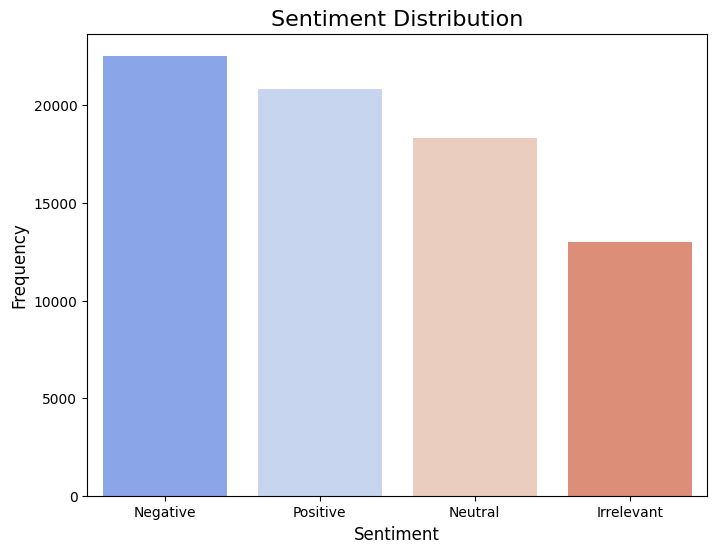

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors  # For interactivity

# Creating the bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=Sentiment.index, y=Sentiment.values, palette='coolwarm')  # Custom color palette (e.g., 'coolwarm')

# Adding title, labels, and grid
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adding interactivity: show the frequency when hovering over the bars
cursor = mplcursors.cursor(bar_plot.patches, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Frequency: {int(Sentiment.values[sel.index])}"))

# Showing the plot
plt.show()
